In [106]:
import pandas as pd

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import random

import scipy
from scipy import stats
from scipy.stats import binom,poisson,norm,t

import pylab
from pylab import legend, plot, show ,title, xlabel, ylabel

import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.stats import proportion as ssp

from scipy.stats import chisquare, chi2_contingency

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report

from statsmodels import discrete
from statsmodels.discrete import discrete_model
from statsmodels.discrete.discrete_model import MNLogit

# Multi collinearity

In [162]:
df=pd.read_excel('CDAC_DataBook.xlsx',sheet_name='VIF')  #wage=response var
df=df[['Exp','Age','Education','Married','Wage']]

In [163]:
df

,Exp,Age,Education,Married,Wage
0,42,57,9,1,4.95
1,1,19,12,0,6.67
2,4,22,12,0,4.00
3,17,35,12,1,7.50
4,9,28,13,0,13.07
...,...,...,...,...,...
528,5,29,18,0,11.36
529,33,51,12,1,6.10
530,25,48,17,1,23.25
531,13,31,12,1,19.88


In [164]:
married_dum=pd.get_dummies(df.Married,drop_first=True,dtype=int,prefix='Married')
married_dum

,Married_1
0,1
1,0
2,0
3,1
4,0
...,...
528,0
529,1
530,1
531,1


In [165]:
df=df.drop('Married',axis=1)

In [166]:
df=pd.concat([df,married_dum],axis=1)
df

,Exp,Age,Education,Wage,Married_1
0,42,57,9,4.95,1
1,1,19,12,6.67,0
2,4,22,12,4.00,0
3,17,35,12,7.50,1
4,9,28,13,13.07,0
...,...,...,...,...,...
528,5,29,18,11.36,0
529,33,51,12,6.10,1
530,25,48,17,23.25,1
531,13,31,12,19.88,1


In [167]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Wage',axis=1),df.Wage,test_size=0.2,random_state=20)

In [168]:
x_train=sm.add_constant(x_train,prepend=False)
# x_test=sm.add_constant(x_test,prepend=False)

In [169]:
x_train

,Exp,Age,Education,Married_1,const
209,14,38,18,1,1.0
373,20,38,12,0,1.0
76,11,29,12,1,1.0
510,11,33,16,1,1.0
197,36,55,13,0,1.0
...,...,...,...,...,...
218,14,36,16,1,1.0
223,20,38,12,1,1.0
271,16,33,11,1,1.0
474,29,51,16,1,1.0


In [187]:
mod1= sm.Logit(y_train,x_train).fit()

ValueError: endog must be in the unit interval.

In [172]:
y_train

209    22.50
373     7.65
76     10.00
510    13.65
197    17.86
       ...  
218     3.35
223    10.00
271     7.00
474     5.50
355     3.80
Name: Wage, Length: 426, dtype: float64

In [173]:
x_train

,Exp,Age,Education,Married_1,const
209,14,38,18,1,1.0
373,20,38,12,0,1.0
76,11,29,12,1,1.0
510,11,33,16,1,1.0
197,36,55,13,0,1.0
...,...,...,...,...,...
218,14,36,16,1,1.0
223,20,38,12,1,1.0
271,16,33,11,1,1.0
474,29,51,16,1,1.0


In [ ]:
print(mod.summary())

In [ ]:
mod4=sm.OLS(df.Wage,df.drop('Wage',axis=1)).fit()

In [ ]:
print(mod4.summary())

In [ ]:
mod4=sm.OLS(df.Wage,df.drop('Wage',axis=1)).fit()
print(mod4.summary())

In [ ]:
mod5=sm.OLS(df.Wage,df.drop(['Wage','Age','Exp'],axis=1)).fit()
print(mod5.summary())

In [ ]:
df.columns

In [ ]:
for i in range(df.shape[1]):
    print('Column',i,'has VIF factor as',variance_inflation_factor(df.values,i))

In [ ]:
for i in range(df.shape[1]):
    print('Column',df.columns[i],'has VIF factor as',variance_inflation_factor(df.values,i))

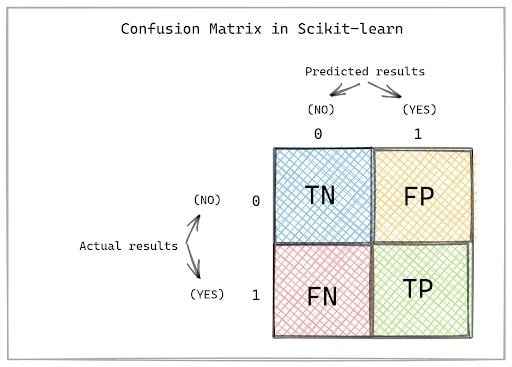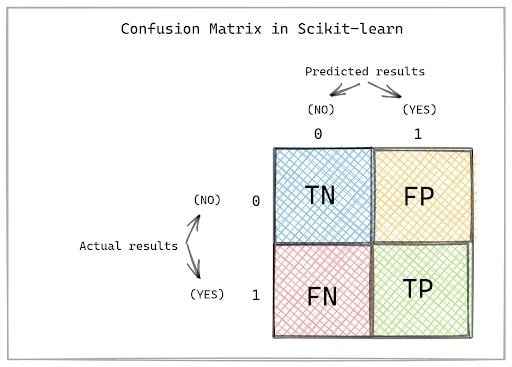

In [ ]:
#Residual analysis

# Assumptions  -
- All the residuals(the difference between the predicted values and the actual values) are normally distributed.
- The residuals are randomly distributed w.r.t. the fitted values(predicted values).
- The variance of the residuals w.r.t the fitted values should be constant.



# For checking Normal distribution
- 68.3% of the data should lie within 1 standard deviation of the mean
- 99.73% of the data should lie within 3 standard deviation of the mean

# Anderson-Darling test
- for checking if the values are normally distributed.
- Its null hypothesis(Ho) is that the data is not normally distributed.

In [176]:
df=pd.read_excel('CDAC_DataBook.xlsx',sheet_name='nominal')

In [177]:
df.head()  
#ses= socio economic status - categorical variable -1,2,3
# prog = response
# - 1-academic, 2- General, 3- vocational 
# math- continuous


,ses,write,math,prog
0,1,35,41,1
1,2,33,41,2
2,3,39,44,3
3,1,37,42,1
4,2,31,40,2


In [178]:
df=df.drop('write',axis=1)

In [179]:
df.head()

,ses,math,prog
0,1,41,1
1,2,41,2
2,3,44,3
3,1,42,1
4,2,40,2


In [180]:
ses_dum=pd.get_dummies(df.ses,drop_first=True,dtype=int,prefix='ses')
ses_dum

,ses_2,ses_3
0,0,0
1,1,0
2,0,1
3,0,0
4,1,0
...,...,...
195,0,1
196,1,0
197,1,0
198,1,0


In [181]:
df=pd.concat([df,ses_dum],axis=1)
df=df.drop('ses',axis=1)

In [182]:
#Feature selection and scaling of features

In [183]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('prog',axis=1),df.prog,test_size=0.2,random_state=20)

In [184]:
x_train=sm.add_constant(x_train,prepend=False)

In [185]:
mod=sm.MNLogit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.653667
         Iterations 8


In [189]:
print(mod.summary())

                          MNLogit Regression Results                          
Dep. Variable:                   prog   No. Observations:                  160
Model:                        MNLogit   Df Residuals:                      152
Method:                           MLE   Df Model:                            6
Date:                Sat, 21 Dec 2024   Pseudo R-squ.:                  0.3687
Time:                        12:00:58   Log-Likelihood:                -104.59
converged:                       True   LL-Null:                       -165.68
Covariance Type:            nonrobust   LLR p-value:                 5.678e-24
    prog=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
math           0.0112      0.036      0.312      0.755      -0.059       0.082
ses_2          3.2174      0.685      4.695      0.000       1.874       4.561
ses_3          2.4719      1.121      2.204      0.0

Ho: math score does not infuence choice between prog1 and prog2<br>
Ho: math score does not infuence choice between prog1 and prog3

When ses changes from 1 to 2, it does not influence choice between prog1 and prog2<br>
When ses changes from 1 to 3, it does not influence choice between prog1 and prog2

prog 2 - 1
Ho (math) is not rejected, math score does not influence choice between prog1 and prog2<br>
Ho (ses-1) is rejected

- when ses changes from 1 to 2, the the odds in favour of prog 2 wrt prog 1 increases by 3.2 and the probabilty of of o/p being prog2 increases.
- when ses changes from 1 to 3, the the odds in favour of prog 2 wrt prog 1 increases by 2.47 and the probabilty of of o/p being prog2 increases.

# for prog3-
-***Math***-<br>
Ho: math score does not infuence choice between prog1 and prog3

prog 3 - 1 Ho (math) is rejected, math influences choice between prog1 and prog3(p<.05)

for every 1 unit rise in math level, the odds in favour of output being prog3 increases by 0.1181 <br>
and the probability of the o/p being prog 3 increases.

-***Ses***-<br>
Ho: When ses changes from 1 to 2, it does not influence choice between prog1 and prog3<br>
Ho: When ses changes from 1 to 3, it does not influence choice between prog1 and prog3

prog 3 -ses<br>
Ho (ses-1) is rejected(p<.05)<br>
Ho (ses-2) is rejected(p<.05)

when ses changes from 1 to 2, the the odds in favour of prog 3 wrt prog 1 increases by 5.44 and the probabilty of of o/p being prog3 increases.<br>
when ses changes from 1 to 3, the the odds in favour of prog 3 wrt prog 1 increases by 6.79 and the probabilty of of o/p being prog3 increases.